# ------------------------ VEHICLE PRICE PREDICTION MODEL -----------------------

### ---------------IMPORTS AND READING IN DATA---------------

First we'll need to import some libraries that will be used during the creation of this prediction model.

    -numpy is used to support pandas in creating arrays and matrices.
    
    -pandas is used to create DataFrames and load in our CSV data for use. 
    
    -matplotlib is used to visualize our data via a good number of plotting tools (histogram,heatmap,bargraph,boxplot,etc.)
    
    -seaborn is used in the same way that matplotlib is used but is more user friendly and easier to use. 
    
    -ipywidgets is used to make the Jupyter Notebook more interactable via buttons, sliders, etc. 
    
    -scipy is used to help us create our supervised machine learning model. In this case it's Linear Regression. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from scipy import stats
from IPython.display import display

# import plotly as py
%matplotlib inline

-------------------------------------------------------------------------------------------------------------------------------
Now using pandas, we can read in our CSV file full of data for future use.

In [2]:
myCSV = pd.read_csv("scrap price.csv")
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

### ---------------INFORMATION GATHERING---------------

Now we'll gather some important information about the data that will be useful to know now and later. 

In [3]:
myCSV

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


We have 205 rows and 26 columns in this DataFrame. 

-------------------------------------------------------------------------------------------------------------------------------
".info()" will check to see if there are any NULL values as well as show every columns name and DataType. 

In [4]:
myCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

-------------------------------------------------------------------------------------------------------------------------------
".describe()" will return important mathemetical information about each NUMERIC column (NOT OBJECT COLUMNS).

In [5]:
myCSV.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


-------------------------------------------------------------------------------------------------------------------------------
Finally, let's show the MAX/MIN values for each column 

In [6]:
print("MAX VALUES FROM THE DATAFRAME...\n\n",myCSV.max())

MAX VALUES FROM THE DATAFRAME...

 ID                        205
symboling                   3
name                vw rabbit
fueltypes                 gas
aspiration              turbo
doornumbers               two
carbody                 wagon
drivewheels               rwd
enginelocation           rear
wheelbase               120.9
carlength               208.1
carwidth                 72.3
carheight                59.8
curbweight               4066
enginetype              rotor
cylindernumber            two
enginesize                326
fuelsystem               spfi
boreratio                3.94
stroke                   4.17
compressionratio         23.0
horsepower                288
peakrpm                  6600
citympg                    49
highwaympg                 54
price                 45400.0
dtype: object


In [7]:
print("MIN VALUES FROM THE DATAFRAME...\n\n",myCSV.min())

MIN VALUES FROM THE DATAFRAME...

 ID                             1
symboling                     -2
name                Nissan versa
fueltypes                 diesel
aspiration                   std
doornumbers                 four
carbody              convertible
drivewheels                  4wd
enginelocation             front
wheelbase                   86.6
carlength                  141.1
carwidth                    60.3
carheight                   47.8
curbweight                  1488
enginetype                  dohc
cylindernumber             eight
enginesize                    61
fuelsystem                  1bbl
boreratio                   2.54
stroke                      2.07
compressionratio             7.0
horsepower                    48
peakrpm                     4150
citympg                       13
highwaympg                    16
price                     5118.0
dtype: object


### ---------------DATA CLEANING---------------

Now that we have an idea of what data we're dealing with, let's clean the data and make it more readable for both the user and the machine learning model. 

First let's remove any potential duplicate rows. (according to ".info()" there are none, but we will run this anyways.)

In [8]:
myCSV.drop_duplicates(inplace=True)

In [9]:
myCSV

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Notice how the number of rows stayed the same. There were no duplicate rows found or removed. 

-------------------------------------------------------------------------------------------------------------------------------

Because we're using a supervised regression algiorithm we need to convert some of the categorical columns to numeric columns.  Let's start by changing the "doornumber" column in myCSV to a numeric number instead of an object.

In [10]:
myCSV["doornumbers"].unique()

array(['two', 'four'], dtype=object)

We now know that there are only two possible "doornumber" column options (two or four). Because of this information, we can just run every value in the "doornumber" column through a if/elif branch using .apply()

In [11]:
def doorNumber(testString):
    if testString == "two":
        return 2
    elif testString == "four":
        return 4
    
myCSV.insert(5,"doorNumbers", myCSV["doornumbers"].apply(doorNumber))

Remove the old "doornumbers" column which was an object because now we have a new column "doorNumbers" that's numeric and will work with the ML model.

In [12]:
myCSV.drop("doornumbers",axis = 1,inplace=True)

-------------------------------------------------------------------------------------------------------------------------------
Now let's do the same as we did above to the "cylindernumber" column.

In [13]:
myCSV["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [14]:
def cylinderNumber(testString):
    if testString == "two":
        return 2
    
    if testString == "three":
        return 3
    
    if testString == "four":
        return 4
    
    if testString == "five":
        return 5
    
    if testString == "six":
        return 6
    
    if testString == "eight":
        return 8
    
    elif testString == "twelve":
        return 12
    
myCSV.insert(14,"cylinderNumber", myCSV["cylindernumber"].apply(cylinderNumber))

In [15]:
myCSV.drop("cylindernumber",axis = 1,inplace=True)

-------------------------------------------------------------------------------------------------------------------------------
Using dummies, we're going to now change the "fueltypes" column (a category/object column) into numeric column(s). This is just a faster way of doing what was done to the above columns. 

In [16]:
myCSV_fueltypes = pd.get_dummies(myCSV["fueltypes"])
myCSV = pd.concat([myCSV, myCSV_fueltypes], axis=1)

In [17]:
myCSV.drop("fueltypes",axis = 1,inplace=True)

-------------------------------------------------------------------------------------------------------------------------------
Now let's do the same as we did above for the "aspiration" column.

In [18]:
myCSV_aspiration = pd.get_dummies(myCSV["aspiration"])
myCSV = pd.concat([myCSV, myCSV_aspiration], axis=1)

In [19]:
myCSV.drop("aspiration",axis = 1,inplace=True)

We've finished doing some basic cleaning to the data. Let's view our semi-finished product. 

In [20]:
myCSV

,ID,symboling,name,doorNumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo
0,1,3,alfa-romero giulia,2,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,0,1,1,0
1,2,3,alfa-romero stelvio,2,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,0,1,1,0
2,3,1,alfa-romero Quadrifoglio,2,hatchback,rwd,front,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,0,1,1,0
3,4,2,audi 100 ls,4,sedan,fwd,front,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950.0,0,1,1,0
4,5,2,audi 100ls,4,sedan,4wd,front,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4,sedan,rwd,front,109.1,188.8,68.9,...,9.5,114,5400,23,28,16845.0,0,1,1,0
201,202,-1,volvo 144ea,4,sedan,rwd,front,109.1,188.8,68.8,...,8.7,160,5300,19,25,19045.0,0,1,0,1
202,203,-1,volvo 244dl,4,sedan,rwd,front,109.1,188.8,68.9,...,8.8,134,5500,18,23,21485.0,0,1,1,0
203,204,-1,volvo 246,4,sedan,rwd,front,109.1,188.8,68.9,...,23.0,106,4800,26,27,22470.0,1,0,0,1


Notice how the doorNumbers column is now numeric and the "diesel","gas","std", and "turbo" columns were added at the end to replace the old object/categorical columns. 

In [21]:
myCSV.columns

Index(['ID', 'symboling', 'name', 'doorNumbers', 'carbody', 'drivewheels',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylinderNumber', 'enginetype', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'diesel', 'gas', 'std',
       'turbo'],
      dtype='object')

-------------------------------------------------------------------------------------------------------------------------------
Next, let's remove the "ID" and "symboling" columns as those columns have no use here. For better readabilty, let's also move the "price" column to the front of the DataFrame.

In [22]:
myCSV.drop("ID", axis = 1,inplace=True)
myCSV.drop("symboling", axis = 1,inplace=True)

In [23]:
first_column = myCSV.pop("price")
myCSV.insert(1,"price",first_column)

In [24]:
myCSV

,name,price,doorNumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,diesel,gas,std,turbo
0,alfa-romero giulia,13495.0,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,0,1,1,0
1,alfa-romero stelvio,16500.0,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,0,1,1,0
2,alfa-romero Quadrifoglio,16500.0,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,0,1,1,0
3,audi 100 ls,13950.0,4,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,0,1,1,0
4,audi 100ls,17450.0,4,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),16845.0,4,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.15,9.5,114,5400,23,28,0,1,1,0
201,volvo 144ea,19045.0,4,sedan,rwd,front,109.1,188.8,68.8,55.5,...,3.15,8.7,160,5300,19,25,0,1,0,1
202,volvo 244dl,21485.0,4,sedan,rwd,front,109.1,188.8,68.9,55.5,...,2.87,8.8,134,5500,18,23,0,1,1,0
203,volvo 246,22470.0,4,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.40,23.0,106,4800,26,27,1,0,0,1


-------------------------------------------------------------------------------------------------------------------------------
Now let's remove the obvious outlier data.

In [25]:

# Q1 = myCSV.quantile(0.05)
# Q3 = myCSV.quantile(0.95)
# QR = Q3 - Q1
# myCSV = myCSV[~((myCSV < (Q1 - 1.5 * IQR)) |(myCSV > (Q3 + 1.5 * IQR))).any(axis=1)]
# myCSV


-------------------------------------------------------------------------------------------------------------------------------
Checking up on the "name" column, it seems we have A LOT of unique values. Let's clean this up by only having the brand be the vehicle name

In [26]:
print(myCSV["name"].unique(), "\n\n NUMBER OF UNIQUE VEHICLE NAMES: ", myCSV["name"].nunique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [27]:
myCSV.insert(0,"vehicleBrand",myCSV["name"].apply(lambda name : name.split()[0]))
myCSV.drop("name",axis = 1,inplace=True)

In [28]:
print(myCSV["vehicleBrand"].unique(), "\n\n NUMBER OF UNIQUE VEHICLE NAMES: ", myCSV["vehicleBrand"].nunique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo'] 

 NUMBER OF UNIQUE VEHICLE NAMES:  28


We went from 147 UNIQUE vehicle names to 28 UNIQUE vehicle names.

-------------------------------------------------------------------------------------------------------------------------------

### ---------------DATA VISUALIZATION---------------

Now that the data is a bit cleaner, let's begin visualizing the data and the relationships it has with itself

We begin by showcasing the DISTRIBUTION of vehicles based off of their price.

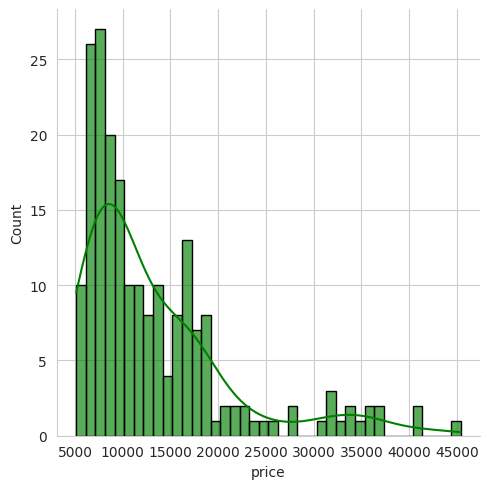

In [29]:
sns.displot(data = myCSV, x = "price", color='g', bins=40, kde=True, linewidth = 1, edgecolor = "black", alpha = 0.65)

Looking at this plot it's clear to see that most vehicles cost between $5,000 - $20,000

-------------------------------------------------------------------------------------------------------------------------------

Next, let's create a heatmap to better understand the relationships between all of our data. This will include "annot=True", which will show the correlation values with the heatmap.

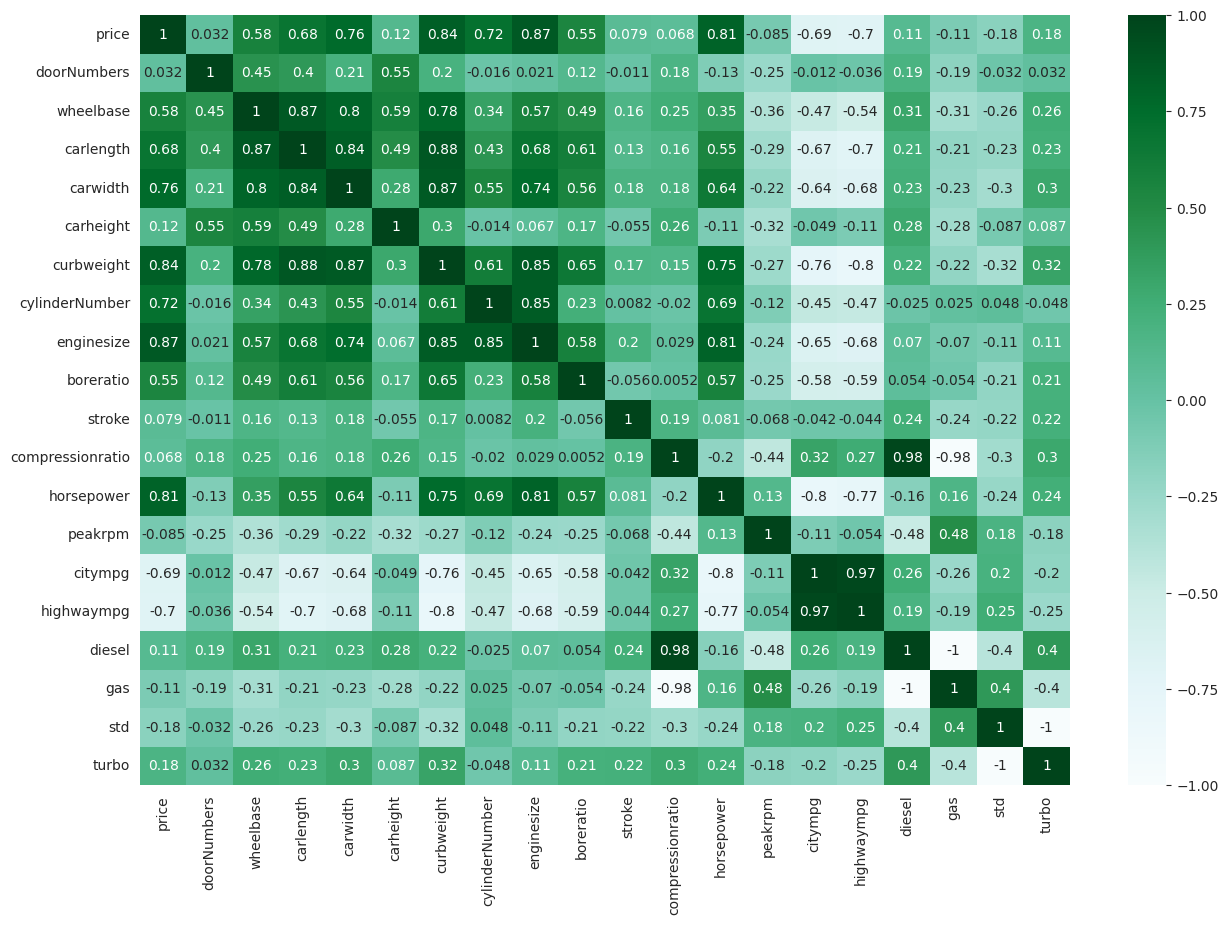

In [30]:
plt.figure(figsize=[15,10])
sns.heatmap(data = myCSV.corr(),annot=True,cmap="BuGn")
plt.show()

Looking at the price column in the heatmap it looks like the following have a high correlation with price...

    -HORSEPOWER (0.81)
    
    -ENGINESIZE (0.87)
    
    -CYLINDERNUMBER (0.72)
    
    -CURBWEIGHT (0.84)
    
    -CARLENGTH (0.66)
    
    -CARWIDTH (0.76
    
Besides those columns, the following have a decent correlation with price...

    -BORERATIO (0.55)
    
    -WHEELBASE (0.58)
    
-------------------------------------------------------------------------------------------------------------------------------

### ---------------CREATING THE VEHICLE PRICE PREDICTION MODEL---------------

Now that we've explored the data let's go ahead and split the data into training and testing sets that will be used for the Linear Regression model

In [31]:
myCSV.columns

Index(['vehicleBrand', 'price', 'doorNumbers', 'carbody', 'drivewheels',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylinderNumber', 'enginetype', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'diesel', 'gas', 'std', 'turbo'],
      dtype='object')

In [32]:
X = myCSV[["doorNumbers","diesel","gas","std","turbo",
       "wheelbase", "carlength",
       "carwidth", "carheight", "curbweight", "cylinderNumber",
       "enginesize", "boreratio", "stroke", "compressionratio",
       "horsepower", "peakrpm", "citympg", "highwaympg"]]

In [33]:
y = myCSV["price"]

Setting up variables. We're going to be using 60% of the data as a test_size which is larger than average (30%). This is done to attempt to improve the accuracy of the Linear Regression prediction model.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

Now it's time to train the model using our training data using LinearRegression


In [35]:
from sklearn.linear_model import LinearRegression
myLinearRegressionModel = LinearRegression()
myLinearRegressionModel.fit(X_train, y_train)

LinearRegression()

-------------------------------------------------------------------------------------------------------------------------------
Now our Linear Regression model is created and trained. Let's check out the coefficients of the model...

In [36]:
print("The coefficients of the model are: \n", myLinearRegressionModel.coef_, "\n")

The coefficients of the model are: 
 [ 1.01814289e+03 -4.79804297e+03  4.79804297e+03  2.20719241e+02
 -2.20719241e+02  5.01641957e+00 -2.98484440e+02  1.13641569e+03
  9.95301923e+01  3.85220199e+00 -9.83290438e+01  1.21949293e+02
 -4.34793454e+03 -3.58951782e+03  1.04497182e+03  8.22764285e+01
  9.31283004e-01 -3.75166933e+02  2.23887886e+02] 



Now let's obtain the models prediction results using the X_test variable that was defined above.

In [37]:
myLinearRegressionModelPrediction = myLinearRegressionModel.predict(X_test)

With the Linear Regression model having made a prediction we can compare the models prediction to the actual correct values (y_test)

Text(0, 0.5, 'Prediction')

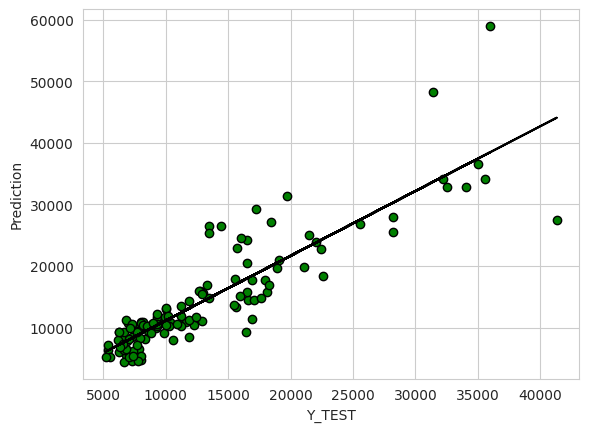

In [38]:
plt.scatter(x = y_test, y = myLinearRegressionModelPrediction, color = "g",edgecolor ="black")
a, b = np.polyfit(y_test, myLinearRegressionModelPrediction, 1)
plt.plot(y_test, a*y_test+b, color ="black")  
plt.xlabel("Y_TEST")
plt.ylabel("Prediction")

The points being around the black line (line of best fit) in the plot above means the predictions were fairly close. The closer the points to the line the better the prediction. 

-------------------------------------------------------------------------------------------------------------------------------

Next let's plot a histogram showcasing the difference betweeen the prediction models guesses (myLinearRegressionModelPrediction) and the correct price (y_test)

<Axes: xlabel='price', ylabel='Count'>

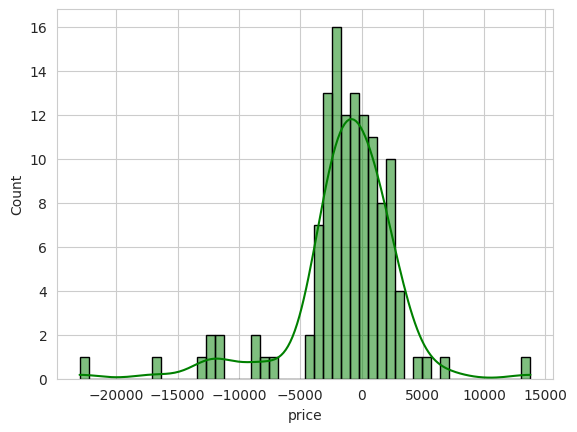

In [39]:
sns.histplot(y_test - myLinearRegressionModelPrediction,color = "g", bins = 50, kde=True,linewidth = 1,edgecolor = "black",alpha = 0.5)

The histogram above shows how far off each prediction was (y_test - myLinearRegressionModelPrecition). This plot tells us that the majority of the predictions were off by +4000 to -4000 USD. 

-------------------------------------------------------------------------------------------------------------------------------

Let's take a deeper look at what is being described in the histogram above by showing the MAE,MSE, and RMSE.

In [40]:
from sklearn import metrics
import math

print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, myLinearRegressionModelPrediction))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, myLinearRegressionModelPrediction))
print("Root Mean Squared Error (RMSE): ", math.sqrt(metrics.mean_squared_error(y_test, myLinearRegressionModelPrediction)))

Mean Absolute Error (MAE):  2821.469146665123
Mean Squared Error (MSE):  20625962.85695474
Root Mean Squared Error (RMSE):  4541.581536970875


Taking at look at the Root Mean Sqaured Error (RMSE) it gives us a value of around 3500-4500, which when looking at the histogram above makes sense because these two values mean the same thing. The RMSE value represents how off a prediction was ON AVERAGE. In this case it means that a prediction of a vehicles price (on average) could be off by around $3,500-$4,500 USD.

-------------------------------------------------------------------------------------------------------------------------------

### ---------------USING THE VEHICLE PRICE PREDICTION MODEL---------------

How to use...

    1. Run the cell below and answer either Y/N to whether you want to the use the prediction model. Press ENTER when you've
        entered either Y/N
    2. Now run the next cell and input your data using the SelectBoxes,Sliders,etc. (ONLY RUN THIS CELL ONCE)
        2a. You may also type in your values if you need to by clicking the number next to a slider and inputting a number.
    3. When all of your data has been inputted correctly, run the NEXT cell to recieve your vehicles price prediction. 
    
    

In [ ]:
userInput = str(input("Do you wish to use the prediction model to predict the price of a vehicle? (Y/N)"))

Do you wish to use the prediction model to predict the price of a vehicle? (Y/N) Y


In [63]:
from ipywidgets import Layout

if (userInput[0] == "Y" or userInput[0] == "y"):
    
    print("Excellent! Please following along with the data input process in order to get your predicted vehicle price from the model.\n")
    
    userDoorNumber = widgets.Dropdown(options=["2", "4"], value="2", layout=Layout(width='500px'), description= "How many DOORS does the vehicle have?", style={'description_width': 'initial'})
    display(userDoorNumber)
    
    userGasType = widgets.Select(options=["Diesel", "Gas"],value="Diesel", layout=Layout(width='500px'), description="What type of GAS does the vehicle use?", style={'description_width': 'initial'})
    display(userGasType)
    
    if(userGasType.value.lower() == "diesel"):
        diesel = 1
        gas = 0
    elif (userGasType.value.lower() == "gas"):
        gas = 0
        diesel = 1
    
    userAspirationType = widgets.Select(options=["Standard", "Turbo"],value="Standard", layout=Layout(width='500px'), description="What type of ASPIRATION does the vehicle use?", style={'description_width': 'initial'})
    display(userAspirationType)
    
    if(userAspirationType.value.lower() == "standard"):
        std = 1
        turbo = 0
    elif (userAspirationType.value.lower() == "turbo"):
        std = 0
        turbo = 1
    
    userWheelBase = widgets.FloatSlider(min = 88.00, max = 110.00, layout=Layout(width='500px'), description = "What's the DISTANCE between the front and rear wheels?", style={'description_width': 'initial'})
    display(userWheelBase)
    
    userCarLength= widgets.FloatSlider(min = 186.00, max = 190.00, layout=Layout(width='500px'), description = "What's the CARS LENGTH?", style={'description_width': 'initial'})
    display(userCarLength)
    
    userCarWidth= widgets.FloatSlider(min = 60.00, max = 70.00, layout=Layout(width='500px'), description = "What's the CARS WIDTH?", style={'description_width': 'initial'})
    display(userCarWidth)
    
    userCarHeight = widgets.FloatSlider(min = 45.00, max = 57.00, layout=Layout(width='500px'), description = "What's the CARS HEIGHT?", style={'description_width': 'initial'})
    display(userCarHeight)
    
    userCarWeight = widgets.FloatSlider(min = 2000.00, max = 4000.00, layout=Layout(width='500px'), description = "What's the CARS WEIGHT?", style={'description_width': 'initial'} )
    display(userCarWeight)
    
    userCarCylinder = widgets.IntSlider(min = 2, max = 12, layout=Layout(width='500px'), description = "How many CYLINDERS does the vehicle have?", style={'description_width': 'initial'})
    display(userCarCylinder)
    
    userCarEngineSize = widgets.IntSlider(min = 70, max = 300, layout=Layout(width='500px'), description = "What is the SIZE of the engine?", style={'description_width': 'initial'})
    display(userCarEngineSize)
    
    userCarBoreRatio = widgets.FloatSlider(min = 2.00, max = 4.00, layout=Layout(width='500px'), description = "What is the BORE RATIO of the vehicle?", style={'description_width': 'initial'})
    display(userCarBoreRatio)
    
    userCarStroke = widgets.FloatSlider(min = 2.00, max = 4.50, layout=Layout(width='500px'), description = "What is the STROKE VALUE of the vehicle?", style={'description_width': 'initial'})
    display(userCarStroke)
    
    userCarCompressionRatio = widgets.FloatSlider(min = 7.00, max = 24.00, layout=Layout(width='500px'), description = "What is the COMPRESSION RATIO of the vehicle?", style={'description_width': 'initial'})
    display(userCarCompressionRatio)
    
    userCarHorsepower = widgets.IntSlider(min = 50, max = 210, layout=Layout(width='500px'), description = "What is the HORSEPOWER of the vehicle?", style={'description_width': 'initial'})
    display(userCarHorsepower)
    
    userCarPeakRPM = widgets.IntSlider(min = 4000, max = 7000, layout=Layout(width='500px'), description = "What is the PEAK RPM of the vehicle?", style={'description_width': 'initial'})
    display(userCarPeakRPM)
    
    userCarMPGCity = widgets.IntSlider(min = 12, max = 50, layout=Layout(width='500px'), description = "What is the MPG (MILES PER GALLON) in CITIES?", style={'description_width': 'initial'})
    display(userCarMPGCity)
    
    userCarMPGHighway = widgets.IntSlider(min = 15, max = 60, layout=Layout(width='500px'), description = "What is the MPG (MILES PER GALLON) on HIGHWAYS", style={'description_width': 'initial'})
    display(userCarMPGHighway)
    
    
else: 
    print("User typed No")

Excellent! Please following along with the data input process in order to get your predicted vehicle price from the model.



Dropdown(description='How many DOORS does the vehicle have?', layout=Layout(width='500px'), options=('2', '4')…

Select(description='What type of GAS does the vehicle use?', layout=Layout(width='500px'), options=('Diesel', …

Select(description='What type of ASPIRATION does the vehicle use?', layout=Layout(width='500px'), options=('St…

FloatSlider(value=88.0, description="What's the DISTANCE between the front and rear wheels?", layout=Layout(wi…

FloatSlider(value=186.0, description="What's the CARS LENGTH?", layout=Layout(width='500px'), max=190.0, min=1…

FloatSlider(value=60.0, description="What's the CARS WIDTH?", layout=Layout(width='500px'), max=70.0, min=60.0…

FloatSlider(value=45.0, description="What's the CARS HEIGHT?", layout=Layout(width='500px'), max=57.0, min=45.…

FloatSlider(value=2000.0, description="What's the CARS WEIGHT?", layout=Layout(width='500px'), max=4000.0, min…

IntSlider(value=2, description='How many CYLINDERS does the vehicle have?', layout=Layout(width='500px'), max=…

IntSlider(value=70, description='What is the SIZE of the engine?', layout=Layout(width='500px'), max=300, min=…

FloatSlider(value=2.0, description='What is the BORE RATIO of the vehicle?', layout=Layout(width='500px'), max…

FloatSlider(value=2.0, description='What is the STROKE VALUE of the vehicle?', layout=Layout(width='500px'), m…

FloatSlider(value=7.0, description='What is the COMPRESSION RATIO of the vehicle?', layout=Layout(width='500px…

IntSlider(value=50, description='What is the HORSEPOWER of the vehicle?', layout=Layout(width='500px'), max=21…

IntSlider(value=4000, description='What is the PEAK RPM of the vehicle?', layout=Layout(width='500px'), max=70…

IntSlider(value=12, description='What is the MPG (MILES PER GALLON) in CITIES?', layout=Layout(width='500px'),…

IntSlider(value=15, description='What is the MPG (MILES PER GALLON) on HIGHWAYS', layout=Layout(width='500px')…

ONCE ALL OF THE INFORMATION ABOVE IS FILLED, RUN THE CELL BELOW TO RECIEVE YOUR VEHICLES PRICE PREDICTION

In [64]:
LinearRegressionModelPrediction = myLinearRegressionModel.predict([[int(userDoorNumber.value),diesel,gas,std,turbo,userWheelBase.value,userCarLength.value,userCarWidth.value,userCarHeight.value,userCarWeight.value,userCarCylinder.value,userCarEngineSize.value,userCarBoreRatio.value,userCarStroke.value,userCarCompressionRatio.value,userCarHorsepower.value,userCarPeakRPM.value,userCarMPGCity.value,userCarMPGHighway.value]])
print("The predicted PRICE of the vehicle given the characteristics told about it is... ", LinearRegressionModelPrediction )
print("\nRemember, this value could be off by as much as ", math.sqrt(metrics.mean_squared_error(y_test, myLinearRegressionModelPrediction)), "(Root Mean Squared Error (RMSE))")

The predicted PRICE of the vehicle given the characteristics told about it is...  [-12770.47622572]

Remember, this value could be off by as much as  4541.581536970875 (Root Mean Squared Error (RMSE))


/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
